# Newton's Methods for Nonlinear Systems of Equations

In [3]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

The following code block defines Newton's method to solve the equation (or system of equations) given by $f(x) = 0$ with initial guess $x_0$.  In order for this program to work, you need to pass in the following:
* `x0` initial guess
* `f` a function that take $x$ as an input and returns $f(x)$.  
* `df` a function that takes $x$ as an input, and returns the Jacobian of $f(x)$ at the point $x$.  

Optional arguments are as follows:
* `tol` measures $\vert x_n - x_{n-1}\vert$ to see how much the method is changing with each iteration. We consider the solution converged when the Newton iteration doesn't update the solution.  This value is set to $10^{-5}$ by default, but can be overwritten.
* `max_iter` is the maximum number of Newton iterations to take.  This value is set to 100 by default and can be overwritten.  

In [4]:
def newton(x0,f,df,tol=1e-5,max_iter=100):
    N = np.size(x0)
    for n in range(0,max_iter):
        if N>1:
            y = -np.linalg.solve(df(x0),f(x0))
        else:
            y = -f(x0)/df(x0)
        x1 = x0 + y
        if np.linalg.norm(x1-x0)<tol:
            print("Newton's method converged in %1.f iterations" % (n-1))
            return x1
        else:
            x0 = x1
    print("Method failed to converge.")
    return []

## Example #1

Here, we would like to solve the system of equations given by 
\begin{eqnarray*}
x^3 + y &=&1\\
y^3 - x &=& -1
\end{eqnarray*}

Note, that since this is a system of equations, we want to write this in the form 
$$F(\vec{x}) = 0, \qquad F(\vec{x}) = \begin{bmatrix} x^3 + y - 1\\ y^3 - x + 1\end{bmatrix}, \qquad \vec{x} = \begin{bmatrix}x\\y\end{bmatrix}$$

Also, note that the Jacobian of $F(\vec{x})$ is given by 
$$DF(\vec{x}) = \begin{bmatrix} 3x^2 & 1\\ -1 & 3y^2\end{bmatrix}$$

In [5]:
def F_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([x**3 + y - 1,y**3 - x + 1])
        
def DF_ex1(X):
    x = X[0]
    y = X[1]
    return np.array([[3*x**2,1],[-1,3*y**2]])

In [6]:
x0 = np.array([1,2])                     # set the initial guess
x = newton(x0,F_ex1,DF_ex1)              # use Newton's method
if np.size(x)<1:
    print('no solution')
else:
    error = np.linalg.norm(F_ex1(x))
    print('The numerical solution is given by x = %2.3e and y = %2.3e with |F(x)| = %2.3e' %(x[0],x[1],error))

Newton's method converged in 6 iterations
The numerical solution is given by x = 1.000e+00 and y = 3.012e-17 with |F(x)| = 0.000e+00


## Example #2: Solving Nonlinear BVPs

Here, we consider solving the boundary value problem $$u''(x) = e^{u(x)}, \qquad u(-1) = u(1) = 0.$$
In order to solve this numerically, we numerically represent the second derivative $u''(x)$ via a second-order finite difference method.

If we let $$\vec{u} = \begin{bmatrix}u_1\\u_2\\\vdots\\u_N\end{bmatrix}$$ represent the solution at $N$ data points *interior* to $x = -1$ and $x = 1$, then we can approximate $u''(x) - e^{u(x)} = 0$ as 

$$\frac{1}{h^2}\begin{bmatrix}%
     -2 & 1 & 0 & \cdots & \cdots & 0\\
     1 & -2 & 1 & \cdots & \cdots & 0\\
      & \ddots &\ddots & \ddots\\
     &&\ddots & \ddots & \ddots\\
     0 & \cdots & & 1&-2&1\\
     0 & \cdots & &0&1&-2
     \end{bmatrix}\begin{bmatrix}u_1\\u_2\\ \\ \vdots \\\\u_N\end{bmatrix}-\begin{bmatrix}e^{u_1}\\e^{u_2}\\ \\ \vdots\\\\e^{u_N}\end{bmatrix} = \vec{0}$$
     
Since our unknowns are $u_1, u_2, \ldots, u_N$, we can represent the Jacobian as 
$$DF(\vec{u}) = \frac{1}{h^2}\begin{bmatrix}%
     -2-h^2e^{u_1} & 1 & 0 & \cdots & \cdots & 0\\
     1 & -2-h^2e^{u_2} & 1 & \cdots & \cdots & 0\\
      & \ddots &\ddots & \ddots\\
     &&\ddots & \ddots & \ddots\\
     0 & \cdots & & 1&-2-h^2e^{u_{N-1}}&1\\
     0 & \cdots & &0&1&-2 - h^2e^{u_N}
     \end{bmatrix}$$

In [7]:
def F_bvp1(U):
    N = len(U)
    h = 2/(N+1)
    D2 = -2*np.diag(np.ones(N),0)
    D2 = D2 + np.diag(np.ones(N-1),-1)
    D2 = D2 + np.diag(np.ones(N-1), 1)
    D2 = D2/h**2
    return np.matmul(D2,U) - np.exp(U)
    
def DF_bvp1(U):
    N = len(U)
    h = 2/(N+1)
    D2 = -2*np.diag(np.ones(N),0)
    D2 = D2 + np.diag(np.ones(N-1),-1)
    D2 = D2 + np.diag(np.ones(N-1), 1)
    D2 = D2/h**2
    return D2 - np.diag(np.exp(U),0)

In [8]:
numPoints = 100;
x = np.linspace(-1,1,numPoints)    # create a grid spacing
xint = x[1:-1]                     # select only the interior points
U0 = -(xint-1)*(xint + 1)          # create an initial guess
UInt = newton(U0,F_bvp1,DF_bvp1)   # solve using Newton's method


Newton's method converged in 3 iterations


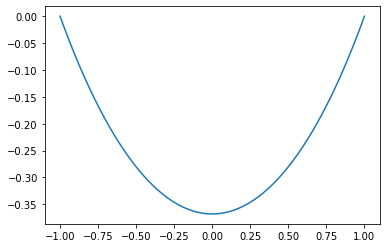

In [9]:
U = np.hstack([0,UInt, 0])
plt.plot(x,U)
plt.show()

## Example 3: Numerical Continuation and Homotopy Methods
Imagine that you want to use Newton's method to solve the polynomial $$\underbrace{(u^2 - 1)(u^2 - 4)}_{G(u)} =0.$$
We don't need Newton's method to do this.  We can easily solve the problem by hand.  That is, we know that the roots are $\lbrace -2, -1, 1, 2\rbrace$.  But let's say we didn't know that.  Remember, the convergence of Newton's method depends heavily on the initial guess.  The following code block defines the functions as follows:
* `F_ex3a(u)` defines the function $G(u) = (u^2-1)(u^2-4)$ to be solved such that $G(u) = 0$.
* `DF_ex3a(u)` defines the Jacobian of the function $DG(u) = \frac{dG}{du}$ to be used by Newton's method
* `u0` is the initial guess. 
Try modifying the initial guess to see which root you converge to.  Note: some initial guess may not converge!  Why?

In [14]:
def F_ex3a(u):
    return (u**2 - 1)*(u**2-4)

def DF_ex3a(u):
    return 4*u**3 - 10*u

u0 = 0.1 # initial Guess

newton(u0,F_ex3a,DF_ex3,tol=1e-10)

Newton's method converged in 23 iterations


2.0000000000432885

### What is Numerical Continuation?
Now, let's take this up a notch.  Let's say we wanted to solve $$G(u,\lambda) = (u^2 - 1)(u^2 - 1) +\lambda\: u^2 e^{u/10} = 0.$$    We know that when $\lambda = 0$, we have the solutions $u = \pm 1, \pm 2$.  But, what happens as we increase $\lambda$ from $\lambda = 0$?  How do the roots change?  We would like to see how the solutions vary as a function of $\lambda$ once $\lambda \neq 0$.  This is where numerical continuation comes into play.  

The idea is as follows: To solve the equation $G(u,\lambda) = 0$, we want to find the roots for an increasing sequence of $\lambda$ values.  Let's assume that we know a solution $u_0$ when $\lambda = \lambda_0$ (in our example, this would be $\lambda_0 = 0$).  Thus, $$G(u_0,\lambda_0) = 0$$  Now we want to increase the value of $\lambda$ so that $\lambda_1 = \lambda_0 + \delta\lambda$ where $\delta\lambda$ is a small value.  We would like to find the new solution $u_1 = u_0 + \delta u$ such that $$G(u_1,\lambda_1) = 0 \qquad \to \qquad G(u_0 + \delta u,\lambda_0 + \delta\lambda) = 0.$$  

If we think of $\delta$ as a small parameter, then we can expand $G(u_0 + \delta u, \lambda_0 + \delta\lambda) = 0$ as a Taylor series in $\delta$.  Thus, $$G(u_0,\lambda_0) + G_u(u_0,\lambda_0)\delta u + G_\lambda(u_0,\lambda_0)\delta\lambda + \ldots = 0$$


Since we know that $G(u_0,\lambda_0) = 0$, we can drop the higher order terms to find that $$\delta u \approx -\delta\lambda\frac{G_\lambda(u_0,\lambda_0)}{G_u(u_0,\lambda_0)} \qquad \to \qquad u_1\approx u_0 -\frac{G_\lambda(u_0,\lambda_0)}{G_u(u_0,\lambda_0)}$$


Provided that $G_u(u_0,\lambda_0)\neq 0$, then we have a good initial guess for the new solution with a slightly increased value of $\lambda$.  Using this initial guess, we use Newton's method to correct and find the actual root.  We can then repeat the process for increasingly larger value of $\lambda$.  So in short, here is the process:
1. Determine the solution to $G(u_0,\lambda_0) = 0$ for a specific value of the parameter $\lambda_0$.  
2. Increase the value of $\lambda$ by an increment $\delta\lambda$.  Determine an initial guess for Newton's method with $u_1 =\approx u_0 -\frac{G_\lambda(u_0,\lambda_0)}{G_u(u_0,\lambda_0)}$.
3. Solve $G(u_1,\lambda_1) = 0$ using the initial guess found in Step 2.  
4. Lather, rinse, repeat.

The following block of code defines 
* `G(u,lam)` defines the function $G(u,\lambda) = (u^2-1)(u^2-4)+\lambda u^2e^{u/10}$ to be solved such that $G(u,\lambda) = 0$.
* `Gu(u,lam)` defines the partial derivative of $G$ with respect to $u$.  That is, $G_u(u,\lambda) = \frac{\partial G}{\partial u}$ to be used by Newton's method
* `Glam(u,lam)` defines the partial derivative of $G$ with respect to $\lambda$.  That is, $G_{\lambda}(u,\lambda) = \frac{\partial G}{\partial \lambda}$.

In [26]:
def G(u,lam):
    return (u**2-1)*(u**2-4) + lam*(u**2)*np.exp(u/10)

def Gu(u,lam):
    return 4*u**3 - 10*u + lam*(1/10*u**2*np.exp(u/10) +2*u*np.exp(u/10))

def Glam(u,lam):
    return u**2*np.exp(u/10)

In [27]:
lamVals = np.linspace(0,1.2,1001) # pick a range of lambda values increasing from lambda = 0
dlam = lamVals[1]-lamVals[0] # determine the increment delta*lambda


# We know that there are four roots.  For each root, let's continue the path!
roots = np.zeros([len(lamVals),4]) # pre allocate with zeros
roots[0,0:4] = np.array([-2,-1,1,2]) # use the known solutions when lambda = 0.

max_iter = 100
tol = 1e-10

for j in range(0,len(lamVals)-1):
    lam0 = lamVals[j]
    for k in range(0,4):
        u0 = roots[j,k]
        u1 = u0 - dlam*Glam(u0,lam0)/Gu(u0,lam0) # 
        for n in range(0,max_iter): # Newton Iteration Loop
            u1o = u1;
            u1 = u1 - G(u1o,lam0)/Gu(u1o,lam0)
            if np.abs(u1o-u1)<tol:
                roots[j+1,k]=u1
                break
            roots[j+1,k]=np.nan


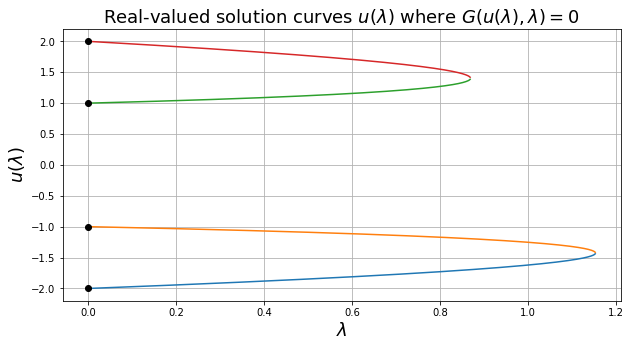

In [28]:
plt.figure(figsize=(10,5))
plt.plot(lamVals,roots)
plt.plot(np.zeros(4,),roots[0,:],'o',color='k')
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel(r'$u(\lambda)$',fontsize=18)
plt.title(r'Real-valued solution curves $u(\lambda)$ where $G(u(\lambda),\lambda) = 0$',fontsize=18)
plt.grid()
plt.show()

## Lagniappe
Here, we chose how to increment the value of $\lambda$.  However, sometimes, we might want to automatically pick different values of $\lambda$.  There are many different flavors of Numerical Continuation.  One of the definitive references on Numerical Continuation is **_Numerical Continuation Methods: An Introduction_** by Eugene L. Allgower and Kurt Georg